In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()


## EDA


In [2]:
df = pd.read_csv("../data/dataset.csv", parse_dates=["Dates"])

In [3]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680826 entries, 0 to 680825
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Dates          680826 non-null  datetime64[ns]
 1   Category       680826 non-null  object        
 2   Descript       680826 non-null  object        
 3   DayOfWeek      680826 non-null  object        
 4   PdDistrict     680826 non-null  object        
 5   Resolution     680826 non-null  object        
 6   Address        680826 non-null  object        
 7   Latitude (Y)   680826 non-null  float64       
 8   Longitude (X)  680826 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 46.7+ MB


In [5]:
df.duplicated().sum()

np.int64(11084)

- I knew it !! even tho I do trust my good old pandas, but still we need to check the duplicates


In [6]:
duplicates = df[df.duplicated(keep=False)]

sample_groups = duplicates.groupby(list(df.columns)).head(1).sample(5, random_state=42)

df[
    df[list(df.columns)]
    .apply(tuple, axis=1)
    .isin(sample_groups[list(df.columns)].apply(tuple, axis=1))
]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X)
6556,2015-04-02 11:34:00,DRUG/NARCOTIC,ILLEGAL SUBSTANCES,Thursday,TENDERLOIN,"ARREST, BOOKED",TURK ST / LEAVENWORTH ST,-122.414056,37.782793
6557,2015-04-02 11:34:00,DRUG/NARCOTIC,ILLEGAL SUBSTANCES,Thursday,TENDERLOIN,"ARREST, BOOKED",TURK ST / LEAVENWORTH ST,-122.414056,37.782793
13891,2015-02-18 12:31:00,DRUG/NARCOTIC,ILLEGAL SUBSTANCES,Wednesday,BAYVIEW,"ARREST, BOOKED",1500 Block of WALLACE AV,-122.390231,37.726911
13892,2015-02-18 12:31:00,DRUG/NARCOTIC,ILLEGAL SUBSTANCES,Wednesday,BAYVIEW,"ARREST, BOOKED",1500 Block of WALLACE AV,-122.390231,37.726911
62582,2014-04-19 15:35:00,DRUG/NARCOTIC,ILLEGAL SUBSTANCES,Saturday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411071,37.781751
62583,2014-04-19 15:35:00,DRUG/NARCOTIC,ILLEGAL SUBSTANCES,Saturday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411071,37.781751
62584,2014-04-19 15:35:00,DRUG/NARCOTIC,ILLEGAL SUBSTANCES,Saturday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411071,37.781751
445206,2007-03-20 06:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,TENDERLOIN,NONE,LEAVENWORTH ST / GEARY ST,-122.414810,37.786519
445207,2007-03-20 06:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,TENDERLOIN,NONE,LEAVENWORTH ST / GEARY ST,-122.414810,37.786519
549466,2005-04-21 23:45:00,DRUG/NARCOTIC,ILLEGAL SUBSTANCES,Thursday,TENDERLOIN,"ARREST, BOOKED",400 Block of ELLIS ST,-122.413609,37.784697


- so we do have the exact same cols duplicated !! let's drop those as we don't want our lil model to cheat


In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(669742, 9)

- Alrightt, now lets tackle those features one by one, just quickly so that we understand what is going on cityX


### 1. Dates


In [10]:
print(f"We have data about cityX from {df['Dates'].min()} up to {df['Dates'].max()}")

We have data about cityX from 2003-01-06 00:01:00 up to 2015-05-13 23:53:00


In [11]:
df["year"] = df["Dates"].dt.year
df["month"] = df["Dates"].dt.month
df["hour"] = df["Dates"].dt.hour

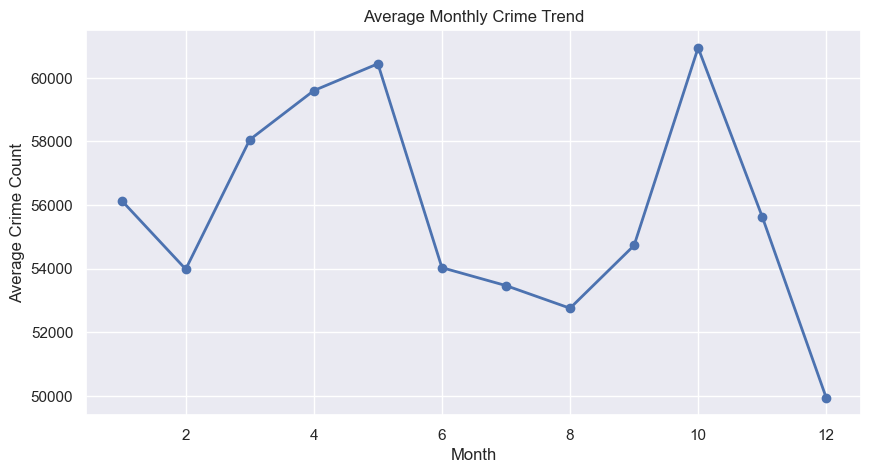

In [12]:
monthly_avg = df.groupby("month").size()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker="o", linestyle="-", linewidth=2)

plt.xlabel("Month")
plt.ylabel("Average Crime Count")
plt.title("Average Monthly Crime Trend")
plt.grid(True)
plt.show()


**okay, over the years, we can notice the following trend in cityX cirme activities**

1. the first month of the year is always quiet and nice, with no troubles
2. little troubles will start to occur from February to around the beginning of May
3. from the beginning of May to around August, CityX people will calm down a little bit
4. from August to October, CityX folks will go crazy, reaching the crime peak in October
5. from October to the end of the year, things will start to calm down, and crime will decrease


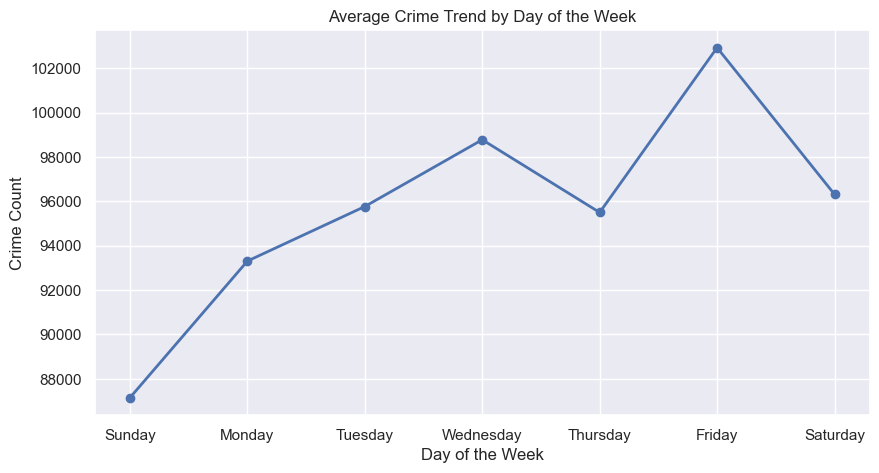

In [13]:
day_avg = df.groupby("DayOfWeek").size()

days_order = [
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
]
day_avg = day_avg.reindex(days_order)

plt.figure(figsize=(10, 5))
plt.plot(day_avg.index, day_avg.values, marker="o", linestyle="-", linewidth=2)

plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.title("Average Crime Trend by Day of the Week")
plt.grid(True)
plt.show()


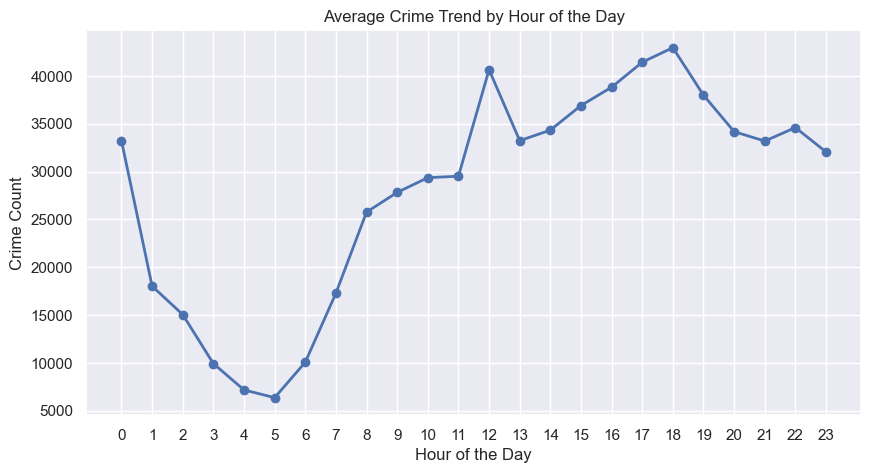

In [14]:
hour_avg = df.groupby("hour").size()

plt.figure(figsize=(10, 5))
plt.plot(hour_avg.index, hour_avg.values, marker="o", linestyle="-", linewidth=2)

plt.xlabel("Hour of the Day")
plt.ylabel("Crime Count")
plt.title("Average Crime Trend by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


- Nice, we can notice clear trends in our data, this information will have big value in next steps


### 2. Category


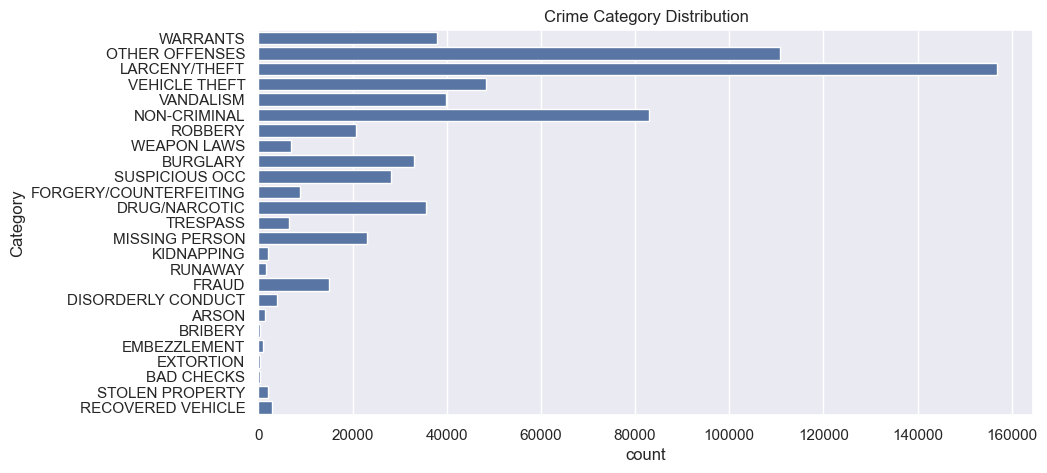

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Category")
plt.title("Crime Category Distribution")
plt.show()

- categories are highly imbalanced, we can return to that later


### 3. Descript


In [16]:
df["Descript"].unique().size

609

- great, since the crime descriptions aren’t very unique, this could help in finding patterns. However, it could also be a problem if many words overlap between descriptions and categories, but we'll keep that for later


### 4. PdDistrict


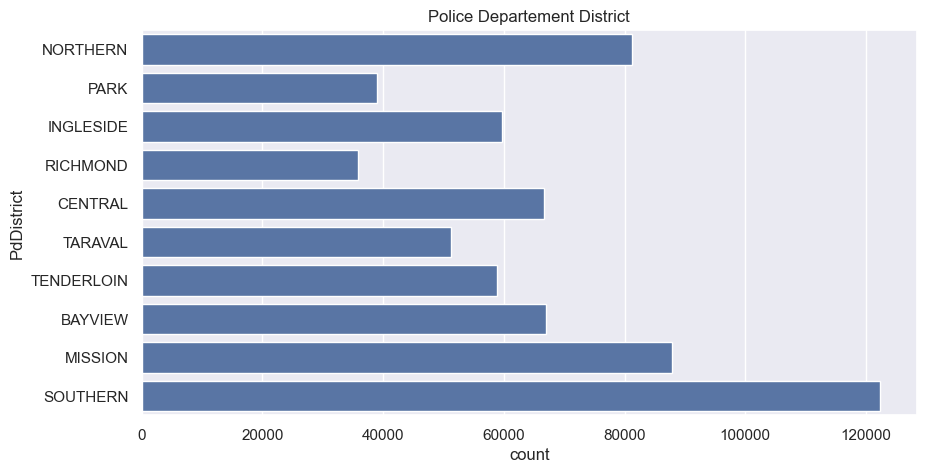

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="PdDistrict")
plt.title("Police Departement District")
plt.show()

- It seems like we have a lot of tourbles in the SOUTHERN, MISSOIN and NORTHERN districts, we'll keep that in mind


### 5. Resolution


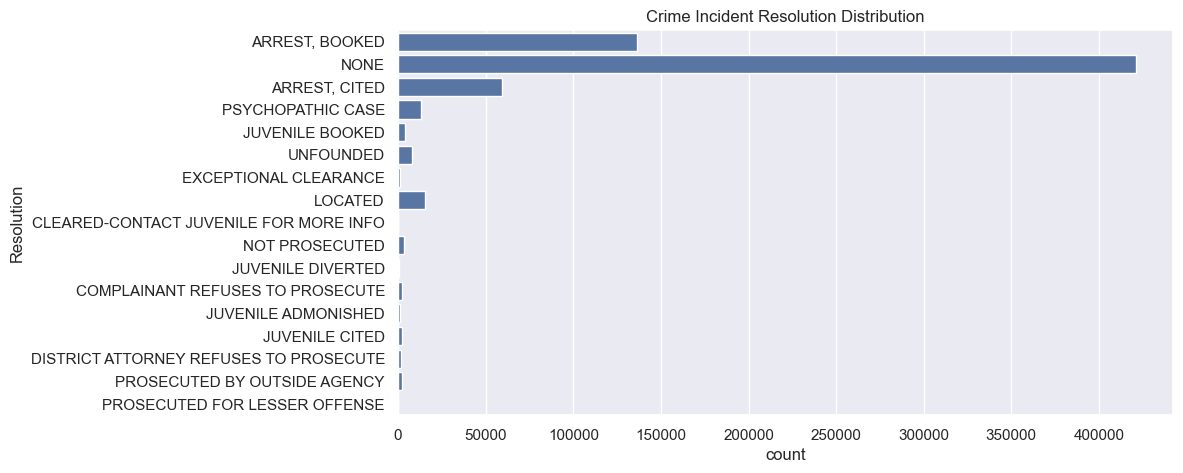

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Resolution")
plt.title("Crime Incident Resolution Distribution")
plt.show()

- the majority of incidents were resolved through arrest (cited/booked) or left unresolved


### 6. Address


In [19]:
df["Address"].unique().size

22844

- okay, so we do have more unique address, let's check the top address where the bad stuff happen


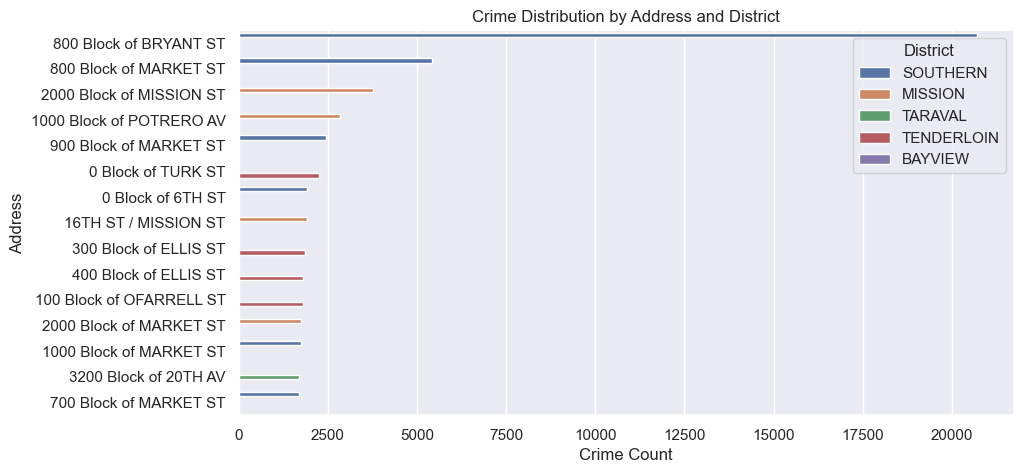

In [20]:
top_addresses = df["Address"].value_counts().head(15).index
filtered_df = df[df["Address"].isin(top_addresses)]

plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, y="Address", hue="PdDistrict", order=top_addresses)

plt.title("Crime Distribution by Address and District")
plt.xlabel("Crime Count")
plt.ylabel("Address")
plt.legend(title="District", loc="upper right")
plt.show()


- Alright buddy, looks like all the trouble is happening in the SOUTHERN district especially around the `800 Block of BRYANT ST` don’t even think about going near that side of cityX !! Also from the top ten addresses, we can see that most of the address are coming from SOUTHERN, MISSION, and TENDERLOIN district


### 8. Latitude (Y) and Longitude (X)


In [21]:
print(df[["Longitude (X)", "Latitude (Y)"]].describe())


       Longitude (X)   Latitude (Y)
count  669742.000000  669742.000000
mean       37.771580    -122.422929
std         0.473931       0.030890
min        37.707879    -122.513642
25%        37.752669    -122.433705
50%        37.775421    -122.416583
75%        37.784479    -122.406759
max        90.000000    -120.500000


- Looks like we have a mistake in our data !! because Latitude are from (-90 to 90) and longitude (-180 to 180), we need to switch the cols


In [22]:
df.rename(
    columns={"Longitude (X)": "latitude", "Latitude (Y)": "longitude"}, inplace=True
)
print(df[["longitude", "latitude"]].describe())

           longitude       latitude
count  669742.000000  669742.000000
mean     -122.422929      37.771580
std         0.030890       0.473931
min      -122.513642      37.707879
25%      -122.433705      37.752669
50%      -122.416583      37.775421
75%      -122.406759      37.784479
max      -120.500000      90.000000


In [23]:
import folium
from folium.plugins import HeatMap

# approximate the police deparment district location
districts = (
    df.groupby("PdDistrict")
    .agg({"latitude": "mean", "longitude": "mean"})
    .reset_index()
)

mean_lat = df["latitude"].mean()
mean_lon = df["longitude"].mean()

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=12, control_scale=True)


# add districts
for _, row in districts.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"District: {row['PdDistrict']}",
        icon=folium.Icon(color="blue"),
    ).add_to(m)


# crime_locations = df[["latitude", "longitude"]].values.tolist()
# HeatMap(crime_locations, radius=15, blur=10, max_zoom=13).add_to(m)


folium.LayerControl().add_to(m)

m


- Okay so cityX was San Francisco all the time !!
- we could continue exploring the relation between the features...but there's no time for now !


## Classify Crime Category


- let's qucikly check base models and we'll be using TF-IDF as it's nice quick and accurate _most_ of the times


In [24]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

X = df["Descript"]
y = df["Category"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=RANDOM_STATE
)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")


Train: 468819, Validation: 100461, Test: 100462


- the models listed below are typically effective for text classification. let's see which one performs best with the CityX data.


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
}

baseline_scores = pd.DataFrame(columns=["Model", "Macro-F1", "Micro-F1"])

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

encoded_labels = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
)


def evaluate_model(model, X_train, X_val, y_train, y_val):
    pipeline = Pipeline(
        [
            ("TF-IDF", TfidfVectorizer()),
            ("model", model),
        ]
    )

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)

    macro_f1 = f1_score(y_val, y_pred, average="macro")
    micro_f1 = f1_score(y_val, y_pred, average="micro")

    return macro_f1, micro_f1


for model_name, model in models.items():
    macro_f1, micro_f1 = evaluate_model(
        model, X_train, X_val, y_train_encoded, y_val_encoded
    )
    baseline_scores.loc[len(baseline_scores)] = [model_name, macro_f1, micro_f1]


In [26]:
baseline_scores.sort_values(by=["Macro-F1"], ascending=False)

,Model,Macro-F1,Micro-F1
1,SVC,0.989487,0.997113
3,Random Forest,0.989480,0.997103
4,XGBoost,0.989472,0.997093
0,Logistic Regression,0.988858,0.996934
2,Naive Bayes,0.982477,0.995451


- okay, SVC got the best score with Macro-F1 = 0.98, although that's often too good to be true, in our case, we don't have that many unique descriptions for the categories, so it's an easier vocabulary for the model to learn, even if that weren't the case, we still have our test split, which the model has never seen, and we will use it later to double-check
- let's check if there's room for improvement with SVC


In [28]:
from sklearn.model_selection import GridSearchCV

pipeline_svc = Pipeline([("TF-IDF", TfidfVectorizer()), ("SVC", SVC())])

# params
param_grid = {
    "SVC__C": [0.1, 1],
    "SVC__kernel": ["linear", "rbf"],
    "SVC__gamma": ["scale"],
    "SVC__class_weight": [None, "balanced"],
}

grid_search = GridSearchCV(
    pipeline_svc, param_grid, cv=3, n_jobs=-1, scoring="f1_macro", verbose=3
)

grid_search.fit(X_train, y_train_encoded)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END SVC__C=0.1, SVC__class_weight=None, SVC__gamma=scale, SVC__kernel=linear;, score=0.988 total time= 2.8min
[CV 2/3] END SVC__C=0.1, SVC__class_weight=None, SVC__gamma=scale, SVC__kernel=linear;, score=0.989 total time= 2.9min
[CV 3/3] END SVC__C=0.1, SVC__class_weight=None, SVC__gamma=scale, SVC__kernel=linear;, score=0.989 total time= 2.9min
[CV 1/3] END SVC__C=1, SVC__class_weight=None, SVC__gamma=scale, SVC__kernel=linear;, score=0.989 total time= 1.1min
[CV 2/3] END SVC__C=1, SVC__class_weight=None, SVC__gamma=scale, SVC__kernel=linear;, score=0.990 total time= 1.2min
[CV 3/3] END SVC__C=1, SVC__class_weight=None, SVC__gamma=scale, SVC__kernel=linear;, score=0.990 total time= 1.2min
[CV 1/3] END SVC__C=0.1, SVC__class_weight=None, SVC__gamma=scale, SVC__kernel=rbf;, score=0.987 total time= 4.7min
[CV 2/3] END SVC__C=0.1, SVC__class_weight=None, SVC__gamma=scale, SVC__kernel=rbf;, score=0.987 total time= 4.7min


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.1, 1],
                         'SVC__class_weight': [None, 'balanced'],
                         'SVC__gamma': ['scale'],
                         'SVC__kernel': ['linear', 'rbf']},
             scoring='f1_macro', verbose=3)

In [29]:
print("Best Parameters:", grid_search.best_params_)
print("Best Macro-F1 Score:", grid_search.best_score_)

Best Parameters: {'SVC__C': 1, 'SVC__class_weight': None, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}
Best Macro-F1 Score: 0.9894679979684343


- well it was not really worth it, another thing we could change is the way we vectorize the text...but not for now
- let's test the model with the testing set


In [30]:
from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_

y_test_encoded = label_encoder.transform(y_test)
y_test_pred = best_model.predict(X_test)

f1_macro = f1_score(y_test_encoded, y_test_pred, average="macro")
f1_micro = f1_score(y_test_encoded, y_test_pred, average="micro")

print(f"Macro-F1: {f1_macro}")
print(f"Micro-F1: {f1_micro}")
print(classification_report(y_test_encoded, y_test_pred))

Macro-F1: 0.9902002110972549
Micro-F1: 0.9973721407099202
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00      4944
           4       1.00      1.00      1.00       584
           5       1.00      1.00      1.00      5323
           6       1.00      1.00      1.00       155
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00      1318
           9       1.00      1.00      1.00      2251
          10       1.00      1.00      1.00       314
          11       1.00      1.00      1.00     23515
          12       1.00      1.00      1.00      3461
          13       1.00      1.00      1.00     12432
          14       1.00      1.00      1.00     16602
          15       0.66      0.95      0.77       423
          16       1.00

- pretty good, we were ablt to get 0.99 Macro-F1 on a data that the model never seen !
- the only thing that the model sturggle to classify is `RECOVERED VEHICLE` which is kinda werid, since most description for that class are clear and metion the term "Recoverd" exactly
- now let's build the final pipeline that will output the category along with severtiy


In [31]:
class CrimeClassifier:
    def __init__(self, model):
        self.model = model
        # encoded categories
        self.num_to_category = {
            0: "ARSON",
            1: "BAD CHECKS",
            2: "BRIBERY",
            3: "BURGLARY",
            4: "DISORDERLY CONDUCT",
            5: "DRUG/NARCOTIC",
            6: "EMBEZZLEMENT",
            7: "EXTORTION",
            8: "FORGERY/COUNTERFEITING",
            9: "FRAUD",
            10: "KIDNAPPING",
            11: "LARCENY/THEFT",
            12: "MISSING PERSON",
            13: "NON-CRIMINAL",
            14: "OTHER OFFENSES",
            15: "RECOVERED VEHICLE",
            16: "ROBBERY",
            17: "RUNAWAY",
            18: "STOLEN PROPERTY",
            19: "SUSPICIOUS OCC",
            20: "TRESPASS",
            21: "VANDALISM",
            22: "VEHICLE THEFT",
            23: "WARRANTS",
            24: "WEAPON LAWS",
        }

        # severtiy mapping
        self.crime_to_severity = {
            "NON-CRIMINAL": 1,
            "SUSPICIOUS OCC": 1,
            "MISSING PERSON": 1,
            "RUNAWAY": 1,
            "RECOVERED VEHICLE": 1,
            "WARRANTS": 2,
            "OTHER OFFENSES": 2,
            "VANDALISM": 2,
            "TRESPASS": 2,
            "DISORDERLY CONDUCT": 2,
            "BAD CHECKS": 2,
            "LARCENY/THEFT": 3,
            "VEHICLE THEFT": 3,
            "FORGERY/COUNTERFEITING": 3,
            "DRUG/NARCOTIC": 3,
            "STOLEN PROPERTY": 3,
            "FRAUD": 3,
            "BRIBERY": 3,
            "EMBEZZLEMENT": 3,
            "ROBBERY": 4,
            "WEAPON LAWS": 4,
            "BURGLARY": 4,
            "EXTORTION": 4,
            "KIDNAPPING": 5,
            "ARSON": 5,
        }

    def classify(self, description):
        prediction = self.model.predict([description])[0]

        # map to category
        category = self.num_to_category.get(prediction, "Unknown")

        # map category to severity
        severity = self.crime_to_severity.get(category, "Unknown")

        return {"category": category, "severity": str(severity)}


classifier = CrimeClassifier(grid_search.best_estimator_)

In [32]:
import cloudpickle

with open("crime-classifier.pkl", "wb") as f:
    cloudpickle.dump(classifier, f)

- let's test our filnal pipline


In [33]:
with open("crime-classifier.pkl", "rb") as f:
    model = cloudpickle.load(f)

In [34]:
model.classify("GRAND THEFT FROM LOCKED AUTO")

{'category': 'LARCENY/THEFT', 'severity': '3'}